In [16]:
%matplotlib inline

import gym
import numpy as np
from matplotlib import pyplot as plt

import sys
import sklearn.pipeline
import sklearn.preprocessing


from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import RBFSampler

In [29]:
env = gym.envs.make("MountainCar-v0")

observation_examples = np.array([env.observation_space.sample() for x in range(2)])

print(observation_examples)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(observation_examples)

print(observation_examples.shape)


featurizer = sklearn.pipeline.FeatureUnion([
        ("rbf1", RBFSampler(gamma=5.0, n_components=100)),
        ("rbf2", RBFSampler(gamma=2.0, n_components=100)),
        ("rbf3", RBFSampler(gamma=1.0, n_components=100)),
        ("rbf4", RBFSampler(gamma=0.5, n_components=100))
        ])
featurizer.fit(scaler.transform(observation_examples))
scaled = scaler.transform([env.reset()])
featurized = featurizer.transform(scaled)

print(featurized.shape)

[[-0.95413864  0.04069714]
 [-0.33588     0.04051866]]
(2, 2)
(1, 400)


TypeError: render() got an unexpected keyword argument 'close'

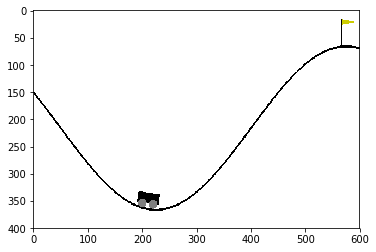

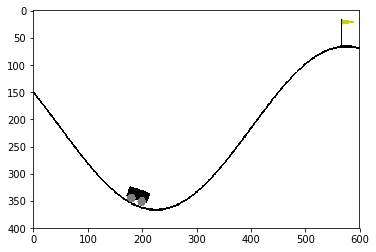

In [3]:
env.reset()
plt.figure()
plt.imshow(env.render(mode='rgb_array'))

[env.step(0) for x in range(10000)]
plt.figure()
plt.imshow(env.render(mode='rgb_array'))

env.render(close=True)